<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#(1) Count the frequency of all the N-grams (N=3).
import pandas as pd
import nltk
from nltk.util import ngrams
from collections import Counter
import nltk
nltk.download('punkt')

# load dataset
data = pd.read_csv("/content/drive/MyDrive/Assignment three /apple_reviews_1 (2).csv")

# combine all reviews into a single string
all_text = " ".join(data["review"].values.tolist())

# tokenize the text
tokens = nltk.word_tokenize(all_text)

# create a list of all trigrams
trigrams = ngrams(tokens, 3)

# count the frequency of each trigram
trigram_counts = Counter(trigrams)

# print the 10 most common trigrams
trigram_counts.most_common(10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[(('?', '?', '?'), 6),
 (('.', 'Battery', 'life'), 3),
 (('Battery', 'life', 'is'), 3),
 (('.', 'I', 'have'), 3),
 (('iOS', '16', ','), 3),
 (('user', ',', 'I'), 2),
 (('I', 'would', 'say'), 2),
 (('is', "n't", 'any'), 2),
 ((',', 'Android', 'phones'), 2),
 (('Android', 'phones', 'are'), 2)]

In [ ]:
#(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33
# create a list of all bigrams
bigrams = ngrams(tokens, 2)

# count the frequency of each bigram
bigram_counts = Counter(bigrams)

# calculate the probability of each bigram
bigram_probabilities = {}
for bigram, count in bigram_counts.items():
    w1, w2 = bigram
    bigram_probabilities[bigram] = count / tokens.count(w1)

# print the 10 most common bigrams with their probabilities
for bigram, count in bigram_counts.most_common(10):
    probability = bigram_probabilities[bigram]
    print(f"{bigram}: {count} ({probability:.2f})")

('.', 'The'): 13 (0.15)
('.', 'I'): 11 (0.13)
(',', 'the'): 8 (0.10)
(',', 'I'): 7 (0.09)
('?', '?'): 7 (0.70)
(',', 'but'): 6 (0.08)
('is', 'a'): 6 (0.14)
('it', "'s"): 5 (0.23)
(',', 'and'): 5 (0.06)
('in', 'Android'): 4 (0.27)


In [ ]:
 nltk.download('averaged_perceptron_tagger')
# extract all noun phrases from the reviews
all_noun_phrases = []
for review in data["review"]:
    sentences = nltk.sent_tokenize(review)
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(tokens)
        noun_phrases = []
        for i in range(len(tagged)):
            if "NN" in tagged[i][1]:
                noun_phrase = [tagged[i][0]]
                j = i + 1
                while j < len(tagged) and "NN" in tagged[j][1]:
                    noun_phrase.append(tagged[j][0])
                    j += 1
                if len(noun_phrase) > 1:
                    noun_phrases.append(" ".join(noun_phrase))
        all_noun_phrases.extend(noun_phrases)

# count the frequency of each noun phrase
noun_phrase_counts = Counter(all_noun_phrases)

# calculate the relative probabilities of each noun phrase
max_counts = {}
for noun_phrase, count in noun_phrase_counts.items():
    words = noun_phrase.split()
    for word in words:
        if word not in max_counts or count > max_counts[word]:
            max_counts[word] = count
noun_phrase_probabilities = {}
for noun_phrase, count in noun_phrase_counts.items():
    noun_phrase_probabilities[noun_phrase] = count / max_counts[noun_phrase.split()[0]]

# create a table of noun phrase frequencies by review
noun_phrase_freqs = pd.DataFrame(columns=noun_phrase_probabilities.keys())
for i, review in enumerate(data["review"]):
    freqs = {noun_phrase: 0 for noun_phrase in noun_phrase_probabilities.keys()}
    sentences = nltk.sent_tokenize(review)
    for sentence in sentences:
        tokens = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(tokens)
        for i in range(len(tagged)):
            if "NN" in tagged[i][1]:
                noun_phrase = [tagged[i][0]]
                j = i + 1
                while j < len(tagged) and "NN" in tagged[j][1]:
                    noun_phrase.append(tagged[j][0])
                    j += 1
                if len(noun_phrase) > 1 and " ".join(noun_phrase) in freqs:
                    freqs[" ".join(noun_phrase)] += 1
    noun_phrase_freqs.loc[i] = freqs

# print the table
print(noun_phrase_freqs)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


     time iPhone user  iPhone user  iPhone ONLY  iOS experience  \
25                  1            1            1               1   
15                  0            0            0               0   
139                 0            0            0               0   
50                  0            0            0               0   
48                  0            0            0               0   
3                   0            0            0               0   
55                  0            0            0               0   
0                   0            0            0               0   
11                  0            0            0               0   
4                   0            0            0               0   

     Android phones  Impressive hardware  promises years  performance ahead.4  \
25                2                    1               1                    1   
15                0                    0               0                    0   
139               0

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here
#(1) To build the documents-terms weights (tf*idf) matrix bold text.
from sklearn.feature_extraction.text import TfidfVectorizer

# create a tfidf vectorizer object
vectorizer = TfidfVectorizer()

# fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(data['review'])

# extract the feature names from the vectorizer
terms = vectorizer.get_feature_names_out()

# create a dataframe from the tfidf matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

# print the dataframe
print(tfidf_df.head())






        100       12       120   13        14        15        16        20  \
0  0.000000  0.00000  0.036048  0.0  0.000000  0.000000  0.000000  0.072095   
1  0.051049  0.00000  0.000000  0.0  0.000000  0.090077  0.120103  0.000000   
2  0.000000  0.12493  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
3  0.057464  0.00000  0.000000  0.0  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.00000  0.000000  0.0  0.176859  0.000000  0.000000  0.000000   

       2015      2020  ...   working     worry     would       wth      yeah  \
0  0.000000  0.000000  ...  0.000000  0.000000  0.061288  0.036048  0.030644   
1  0.030026  0.030026  ...  0.030026  0.030026  0.025525  0.000000  0.025525   
2  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000   

      years       yes       you   youtube  z

In [ ]:
#(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.
from sklearn.metrics.pairwise import cosine_similarity

# define the query
query = "An Outstanding movie with a haunting performance and best character development"

# initialize the vectorizer
vectorizer = TfidfVectorizer()

# fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(data['review'])

# transform the query
query_vector = vectorizer.transform([query])

# calculate cosine similarity between query and documents
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

# sort the documents by cosine similarity to the query
document_scores = list(zip(data['review'], cosine_similarities))
document_scores.sort(key=lambda x: x[1], reverse=True)

# print the top 10 most similar documents
for i, (doc, score) in enumerate(document_scores[:10]):
    print(f"Rank {i+1}: Score {score:.3f}\n{doc}\n")


Rank 1: Score 0.160
The iPhone 12 has been an amazing phone for me. It's great for streaming, messaging, and browsing the internet. Its processing speed is incredibly fast, and the design is sleek and modern. The battery life is also excellent and can easily last a full day of moderate use. The camera is fantastic, and the photos I take look stunning. The display is vivid and bright, making everything look great. Overall, the iPhone 12 has been a great purchase and I'm very pleased with it. BACK COVER From Zapvi

Rank 2: Score 0.146
I migrated to iOS after using Android for more than 8 years. I am a standard mobile user, I do not play games on my phone and neither do I keep browsing social media for ages. The only things that I use my phone are for calling, whatsapp, taking notes, some light photography and watching videos. The most heavily used activity on my phone is watching videos on youtube.With all these activities being done, my weekly average screen on time is 2-3 hours. I am s

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here
#(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).
!pip install gensim==3.8.3
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

reviews = data["review"].apply(lambda x: word_tokenize(x.lower()))
reviews = reviews.apply(lambda x: [word for word in x if word not in stop_words])
model = Word2Vec(reviews, vector_size=300, min_count=1, sg=1)
model.wv["iphone"]



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: ignored

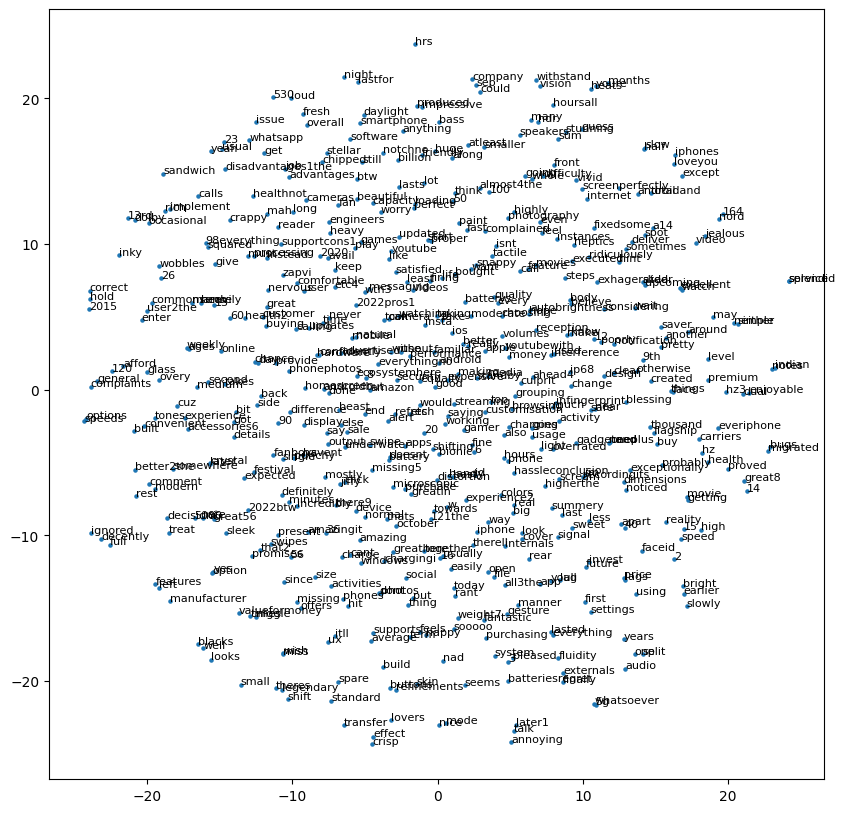

In [ ]:
#(2) Visualize the word embedding model you created.
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Get the word vectors and normalize them to unit length
word_vectors = model.wv.vectors
word_vectors_norm = word_vectors / np.linalg.norm(word_vectors, axis=1, keepdims=True)

# Reduce the dimensionality of the word vectors to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors_norm)

# Create a scatter plot of the word vectors
plt.figure(figsize=(10, 10))
plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], s=5)

# Add labels for each word
for i, word in enumerate(model.wv.index_to_key):
    plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=8)

# Show the plot
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: 



